# 5. Resampling Methods – Conceptual

**Q1.**  Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1−α)Y ). 

<img src="images\islr_ch5_q1.jpg" alt="Drawing" style="width: 800px;"/>

**Q2.** We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

(a) What is the probability that the ﬁrst bootstrap observation is not the jth observation from the original sample? Justify your answer.

During bootstrap sampling the results are independent. So the result is 1-1/n

(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample? 
The same, 1-1/n

(c) Argue that the probability that the jth observation is not in the bootstrap sample is (1−1/n)^n.

With the same logic. The probability that the jth observation is the same in the jth observation in the bootstrap sample is 1/n. 

The probability that it is not, is 1-1/n.

The probability, that the jth observation is not equal wih any of the bootstrap observations is (1-1/n)^n

(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

1-(1-1/n)^n = 1-(1-1/5)^5 = 0.672

(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?
1-(1-1/n)^n = 1-(1-1/100)^100 = 0.634

(f) When n = 10,000, what is the probability that the jth observation is in the bootstrap sample?
1-(1-1/n)^n = 1-(1-1/10000)^10000 = 0.632

(g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

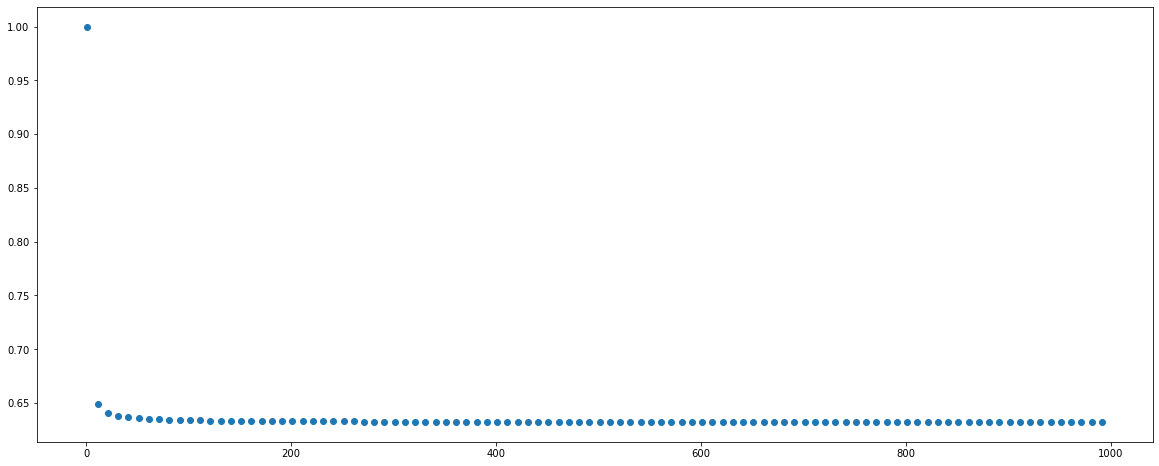

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1,1000, 10)
p = 1-np.power(1- 1/n, n)

plt.figure(figsize=(20,8))
plt.scatter(n, p)

(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [39]:
store = []
for i in range(1, 10000):
    store.append(np.count_nonzero(np.random.randint(low=1, high=101, size=100)==4)>0)

np.mean(store)

0.6285628562856286

Comment on the results obtained.

A known fact from calculus tells us that
limn→∞(1+x/n)^n=e^x
Which is in our case, limn→∞(1-1/n)^n=e^-1=1/e=0.36788


**Q3.** We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

We randomly divide the sample data to k equal sizes. The first fold is treated as the validation set and the method is fit to the remaining k-1 folds and the MSE is calculated on the left out fold. This repeated k times on different fold to leave out. The k-fold CV estimates calculated by averaging the MSEs.

(b) What are the advantages and disadvantages of k-fold crossvalidation relative to: 

i. The validation set approach?

The validation set approach tends to overestimate the test error rate, since the training set only contains the half of the original dataset. However, it is very simple to execute, since wehave one training and validation sample pairs.

ii. LOOCV?

LOOCV will give fairly unbiased estimates of the test error rate since each training sets contains n-1 observations. In the bias perspective LOOCV prefered against k-fold. However, during LOOCV, the training samples are very correlated with each other, therefore increasing the overall varience of the results. So in the bias-variance tradeoff perspective k-fold CV is a better choice.
Also, k-fold is less computationally expensive, especcially when the fitting method is complicated. 


**Q4.** Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

We may estimate the standard deviation of our prediction by using the bootstrap method. In this case, rather than obtaining new independant data sets from the population and fitting our model on those data sets, we instead obtain repeated random samples from the original data set. In this case, we perform sampling with replacement B times and then find the corresponding estimates and the standard deviation of those B estimates by using equation (5.8).